In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("Loan_Train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [3]:
del df['Loan_ID']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,597.000000,612.000000,612.000000,592.000000,598.000000,562.000000
mean,0.850921,5407.638889,1620.334837,146.412162,342.240803,0.841637
std,1.221818,6117.797440,2928.973689,85.587325,64.886931,0.365406
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2880.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,2.000000,5785.000000,2287.750000,168.000000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
df['Education'].replace('Graduate',1.0,inplace=True)
df['Education'].replace('Not Graduate',0.0,inplace=True)
df['Self_Employed'].replace('Yes',2.0,inplace=True)
df['Self_Employed'].replace('No',1.0,inplace=True)
df['Loan_Status'].replace('N',0.0,inplace=True)
df['Loan_Status'].replace('Y',1.0,inplace=True)
df['Property_Area'].replace('Rural',1.0,inplace=True)
df['Property_Area'].replace('Urban',3.0,inplace=True)
df['Property_Area'].replace('Semiurban',2.0,inplace=True)
df['Married'].replace('Yes',1.0,inplace=True)
df['Married'].replace('No',2.0,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,1.0,1.0,1.0,1.0,4583,1508.0,128.0,360.0,1.0,1.0,0.0
1,Male,1.0,0.0,1.0,2.0,3000,0.0,66.0,360.0,1.0,3.0,1.0
2,Male,1.0,0.0,0.0,1.0,2583,2358.0,120.0,360.0,1.0,3.0,1.0
3,Male,2.0,0.0,1.0,1.0,6000,0.0,141.0,360.0,1.0,3.0,1.0
4,Male,1.0,2.0,1.0,2.0,5417,4196.0,267.0,360.0,1.0,3.0,1.0


In [6]:
dfDummies = pd.get_dummies(df['Gender'], prefix = 'category')
df = pd.concat([df, dfDummies], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,category_Female,category_Male
0,Male,1.0,1.0,1.0,1.0,4583,1508.0,128.0,360.0,1.0,1.0,0.0,0,1
1,Male,1.0,0.0,1.0,2.0,3000,0.0,66.0,360.0,1.0,3.0,1.0,0,1
2,Male,1.0,0.0,0.0,1.0,2583,2358.0,120.0,360.0,1.0,3.0,1.0,0,1
3,Male,2.0,0.0,1.0,1.0,6000,0.0,141.0,360.0,1.0,3.0,1.0,0,1
4,Male,1.0,2.0,1.0,2.0,5417,4196.0,267.0,360.0,1.0,3.0,1.0,0,1


In [7]:
del df['Gender']
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,category_Female,category_Male
0,1.0,1.0,1.0,1.0,4583,1508.0,128.0,360.0,1.0,1.0,0.0,0,1
1,1.0,0.0,1.0,2.0,3000,0.0,66.0,360.0,1.0,3.0,1.0,0,1
2,1.0,0.0,0.0,1.0,2583,2358.0,120.0,360.0,1.0,3.0,1.0,0,1
3,2.0,0.0,1.0,1.0,6000,0.0,141.0,360.0,1.0,3.0,1.0,0,1
4,1.0,2.0,1.0,2.0,5417,4196.0,267.0,360.0,1.0,3.0,1.0,0,1


In [8]:
df.describe()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,category_Female,category_Male
count,609.000000,597.000000,612.00000,580.000000,612.000000,612.000000,592.000000,598.000000,562.000000,612.000000,612.000000,612.000000,612.000000
mean,1.348112,0.850921,0.78268,1.141379,5407.638889,1620.334837,146.412162,342.240803,0.841637,2.034314,0.687908,0.183007,0.795752
std,0.476763,1.221818,0.41276,0.348713,6117.797440,2928.973689,85.587325,64.886931,0.365406,0.786839,0.463726,0.386988,0.403481
min,1.000000,0.000000,0.00000,1.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,1.000000,2880.500000,0.000000,100.000000,360.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.00000,1.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,2.000000,1.000000,0.000000,1.000000
75%,2.000000,2.000000,1.00000,1.000000,5785.000000,2287.750000,168.000000,360.000000,1.000000,3.000000,1.000000,0.000000,1.000000
max,2.000000,4.000000,1.00000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B4BDE80>]],
      dtype=object)

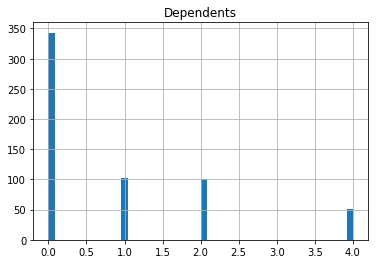

In [9]:
df.hist(column='Dependents', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B802470>]],
      dtype=object)

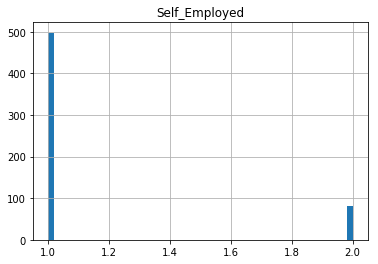

In [10]:
df.hist(column='Self_Employed', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B694940>]],
      dtype=object)

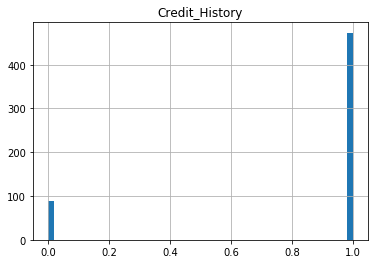

In [11]:
df.hist(column='Credit_History', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BADBEB8>]],
      dtype=object)

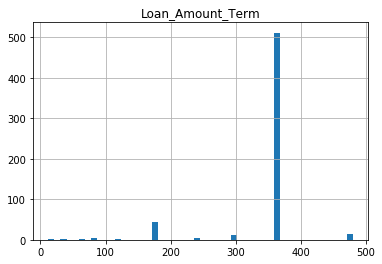

In [12]:
df.hist(column='Loan_Amount_Term', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B8594E0>]],
      dtype=object)

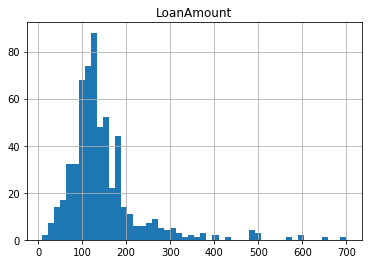

In [13]:
df.hist(column='LoanAmount', bins=50)

In [14]:
df['Dependents'].fillna(0,inplace=True)
df['Married'].fillna(2,inplace=True)
df['Self_Employed'].fillna(2,inplace=True)
df['Credit_History'].fillna(1,inplace=True)
df['Loan_Amount_Term'].fillna(360.0,inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,category_Female,category_Male
0,1.0,1.0,1.0,1.0,4583,1508.0,128.0,360.0,1.0,1.0,0.0,0,1
1,1.0,0.0,1.0,2.0,3000,0.0,66.0,360.0,1.0,3.0,1.0,0,1
2,1.0,0.0,0.0,1.0,2583,2358.0,120.0,360.0,1.0,3.0,1.0,0,1
3,2.0,0.0,1.0,1.0,6000,0.0,141.0,360.0,1.0,3.0,1.0,0,1
4,1.0,2.0,1.0,2.0,5417,4196.0,267.0,360.0,1.0,3.0,1.0,0,1


In [15]:
df.describe()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,category_Female,category_Male
count,612.000000,612.000000,612.00000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,1.351307,0.830065,0.78268,1.186275,5407.638889,1620.334837,146.412162,342.647059,0.854575,2.034314,0.687908,0.183007,0.795752
std,0.477769,1.213890,0.41276,0.389647,6117.797440,2928.973689,84.174896,64.194260,0.352817,0.786839,0.463726,0.386988,0.403481
min,1.000000,0.000000,0.00000,1.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,1.000000,2880.500000,0.000000,100.000000,360.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.00000,1.000000,3812.500000,1188.500000,128.500000,360.000000,1.000000,2.000000,1.000000,0.000000,1.000000
75%,2.000000,1.000000,1.00000,1.000000,5785.000000,2287.750000,165.000000,360.000000,1.000000,3.000000,1.000000,0.000000,1.000000
max,2.000000,4.000000,1.00000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [16]:
df['TotalIncome']=df['CoapplicantIncome']+df['ApplicantIncome']
del df['CoapplicantIncome']
del df['ApplicantIncome']
df.head()

,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,category_Female,category_Male,TotalIncome
0,1.0,1.0,1.0,1.0,128.0,360.0,1.0,1.0,0.0,0,1,6091.0
1,1.0,0.0,1.0,2.0,66.0,360.0,1.0,3.0,1.0,0,1,3000.0
2,1.0,0.0,0.0,1.0,120.0,360.0,1.0,3.0,1.0,0,1,4941.0
3,2.0,0.0,1.0,1.0,141.0,360.0,1.0,3.0,1.0,0,1,6000.0
4,1.0,2.0,1.0,2.0,267.0,360.0,1.0,3.0,1.0,0,1,9613.0


In [17]:
X=df[['Married','Dependents','Education','Self_Employed','TotalIncome','Credit_History','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','category_Female','category_Male']]
Y=df['Loan_Status']
X.head()

,Married,Dependents,Education,Self_Employed,TotalIncome,Credit_History,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,category_Female,category_Male
0,1.0,1.0,1.0,1.0,6091.0,1.0,128.0,360.0,1.0,1.0,0,1
1,1.0,0.0,1.0,2.0,3000.0,1.0,66.0,360.0,1.0,3.0,0,1
2,1.0,0.0,0.0,1.0,4941.0,1.0,120.0,360.0,1.0,3.0,0,1
3,2.0,0.0,1.0,1.0,6000.0,1.0,141.0,360.0,1.0,3.0,0,1
4,1.0,2.0,1.0,2.0,9613.0,1.0,267.0,360.0,1.0,3.0,0,1


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)
X_test.head()

,Married,Dependents,Education,Self_Employed,TotalIncome,Credit_History,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,category_Female,category_Male
579,1.0,2.0,1.0,1.0,6540.0,1.0,205.0,360.0,1.0,2.0,0,1
52,1.0,2.0,1.0,1.0,4616.0,1.0,134.0,360.0,1.0,3.0,0,1
534,2.0,0.0,0.0,2.0,4592.0,1.0,126.0,360.0,1.0,1.0,0,1
348,1.0,0.0,1.0,1.0,8875.0,1.0,187.0,360.0,1.0,1.0,0,1
55,1.0,0.0,1.0,1.0,3723.0,1.0,96.0,360.0,1.0,2.0,0,1


In [92]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, Y_test)))

Accuracy on training set: 0.869
Accuracy on test set: 0.725


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train, Y_train);
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = svm.SVC(kernel='poly').fit(X_train, Y_train)
print("Training set score: {:.3f}".format(clf.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, Y_test)))

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10000).fit(X_train, Y_train)
print("predictions: {}".format(logreg.predict(X_test)[:10]))
print("Training set score: {:.3f}".format(logreg.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, Y_test)))

predictions: [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
Training set score: 0.802
Test set score: 0.830
